In [ ]:
result_df = pd.read_csv('/data/joohyun7u/project/CAST/vggsound_class_wise_stats.csv')
result_df

class  train_total_samples  total_samples  accuracy  \
0       playing hammond organ                  990             50  0.240000   
1    playing electronic organ                  782             49  0.306122   
2                playing harp                  994             50  0.740000   
3             disc scratching                  147             50  0.760000   
4                     raining                  423             49  0.510204   
..                        ...                  ...            ...       ...   
304            spraying water                  228             50  0.700000   
305           playing bassoon                  995             48  1.000000   
306          warbler chirping                  210             49  0.326531   
307            ocean burbling                  932             50  0.280000   
308          sea lion barking                  159             50  0.620000   

     audio_only_accuracy  f1_score  audio_only_f1_score  f1_difference  
0               0.320000  0.338028             0.376471      -0.038442  
1               0.285714  0.357143             0.329412       0.027731  
2               0.740000  0.762887             0.718447       0.044440  
3               0.620000  0.808511             0.704545       0.103965  
4               0.387755  0.500000             0.376238       0.123762  
..                   ...       ...                  ...            ...  
304             0.300000  0.736842             0.410959       0.325883  
305             0.979167  0.989691             0.969072       0.020619  
306             0.122449  0.421053             0.193548       0.227504  
307             0.200000  0.311111             0.277778       0.033333  
308             0.300000  0.712644             0.410959       0.301685  

[309 rows x 8 columns]

# Class-wise F1 Score Î∞è Train ÏÉòÌîå ÌÜµÍ≥Ñ ÏÉùÏÑ±
audio_only_df, ours_df, train_dfÎ•º Ïù¥Ïö©Ìï¥ result_dfÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
- Í∞Å classÎ≥Ñ audio_only/ours f1 score
- train ÏÉòÌîå Ïàò
- improvement (ours - audio_only)

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score


ours_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTCLIP_VMHY_MixSpecCut_AddNoise/pred_result.csv'
audio_only_path = '/data/joohyun7u/project/CAST/log_rebuttal/VGGSound_ASTOnly2/pred_result.csv'
train_csv_path = '/data/joohyun7u/project/CAST/dataset/vggsound/train_sel.csv'
ours_df = pd.read_csv(ours_path)
audio_only_df = pd.read_csv(audio_only_path)
train_df = pd.read_csv(train_csv_path)

# class Î™©Î°ù Ï∂îÏ∂ú
classes = sorted(list(set(ours_df['label']).union(set(audio_only_df['label']))))

# ÌÅ¥ÎûòÏä§Î≥Ñ f1 score Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_class_f1(df, class_list):
    f1_dict = {}
    for cls in class_list:
        y_true = (df['label'] == cls).astype(int)
        y_pred = (df['pred'] == cls).astype(int)
        if y_true.sum() == 0 and y_pred.sum() == 0:
            f1 = np.nan
        else:
            f1 = f1_score(y_true, y_pred, zero_division=0)
        f1_dict[cls] = f1
    return f1_dict

audio_f1 = compute_class_f1(audio_only_df, classes)
ours_f1 = compute_class_f1(ours_df, classes)

# train ÏÉòÌîå Ïàò ÏßëÍ≥Ñ
train_sample_dict = train_df['narration'].value_counts().to_dict()

# result_df ÏÉùÏÑ±
result_df = pd.DataFrame({
    'class': classes,
    'audio_only_f1': [audio_f1[cls] for cls in classes],
    'ours_f1': [ours_f1[cls] for cls in classes],
    'train_total_samples': [train_sample_dict.get(cls, 0) for cls in classes]
})
result_df['improvement'] = result_df['ours_f1'] - result_df['audio_only_f1']

result_df = result_df.sort_values('class').reset_index(drop=True)
result_df

result_df.to_csv('/data/joohyun7u/project/CAST/vggsound_class_wise_stats.csv', index=False)

In [2]:
from sklearn.metrics import f1_score

# =================================================
# 1) ÌèâÍ∞ÄÏö© Ï†ïÎãµ(label)Í≥º Îëê Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í(pred) Ï†ïÎ¶¨
# -------------------------------------------------
# ‚Äª Îëê CSV Î™®Îëê Í∞ôÏùÄ ÏàúÏÑú¬∑Í∏∏Ïù¥Ïùò ÏÉòÌîåÏù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.
y_true            = ours_df['label']
y_pred_ours       = ours_df['pred']
y_pred_audio_only = audio_only_df['pred']

# =================================================
# 2) Ï†ÑÏ≤¥ weighted F1 Í≥ÑÏÇ∞
# -------------------------------------------------
average = 'micro'  # 'macro', 'micro', 'weighted' Ï§ë ÏÑ†ÌÉù Í∞ÄÎä•
f1_ours       = f1_score(y_true, y_pred_ours,       average=average)
f1_audio_only = f1_score(y_true, y_pred_audio_only, average=average)

overall_improvement = f1_ours - f1_audio_only

# =================================================
# 3) Í≤∞Í≥º Ï∂úÎ†•
# -------------------------------------------------
print(f"OURS  weighted F1 : {f1_ours:.4f}")
print(f"AUDIO weighted F1 : {f1_audio_only:.4f}")
print(f"Œî Improvement     : {overall_improvement:+.4f}")


OURS  weighted F1 : 0.6822
AUDIO weighted F1 : 0.5838
Œî Improvement     : +0.0984


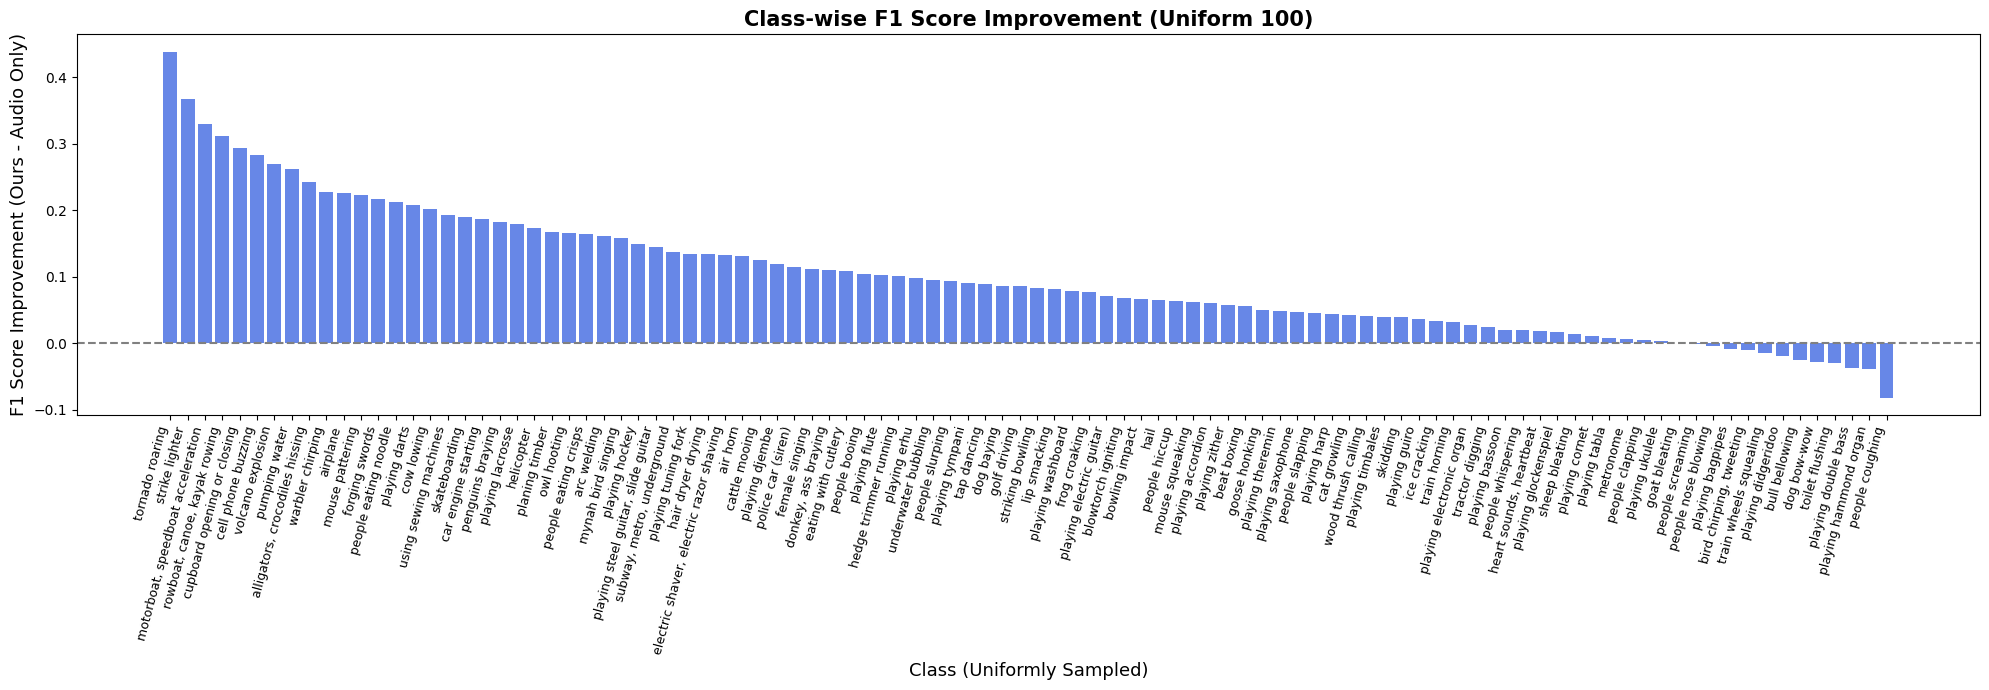

Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_uniform100.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Í∞úÏÑ†Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ÏóêÏÑú Í∑†Îì±ÌïòÍ≤å 100Í∞ú ÏÉòÌîåÎßÅ (index Í∏∞Ï§Ä)
num_classes = len(df_plot)
num_show = 100
if num_classes > num_show:
    indices = np.linspace(0, num_classes-1, num_show, dtype=int)
    df_plot_uniform = df_plot.iloc[indices].reset_index(drop=True)
else:
    df_plot_uniform = df_plot.copy()

plt.figure(figsize=(20, 7))
plt.bar(df_plot_uniform['class'], df_plot_uniform['improvement'], color='royalblue', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('F1 Score Improvement (Ours - Audio Only)', fontsize=13)
plt.xlabel('Class (Uniformly Sampled)', fontsize=13)
plt.title('Class-wise F1 Score Improvement (Uniform 100)', fontsize=15, fontweight='bold')
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.tight_layout()
plt.savefig('classwise_f1_improvement_uniform100.pdf')
plt.show()
print('Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_uniform100.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.')

# ÏÉÅÏúÑ/ÌïòÏúÑ 10Í∞ú ÌÅ¥ÎûòÏä§ Ï∂úÎ†•
# print('Top 10 Improved Classes:')
# print(df_plot.head(10)[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])
# print('\nBottom 10 Classes:')
# print(df_plot.tail(10)[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])

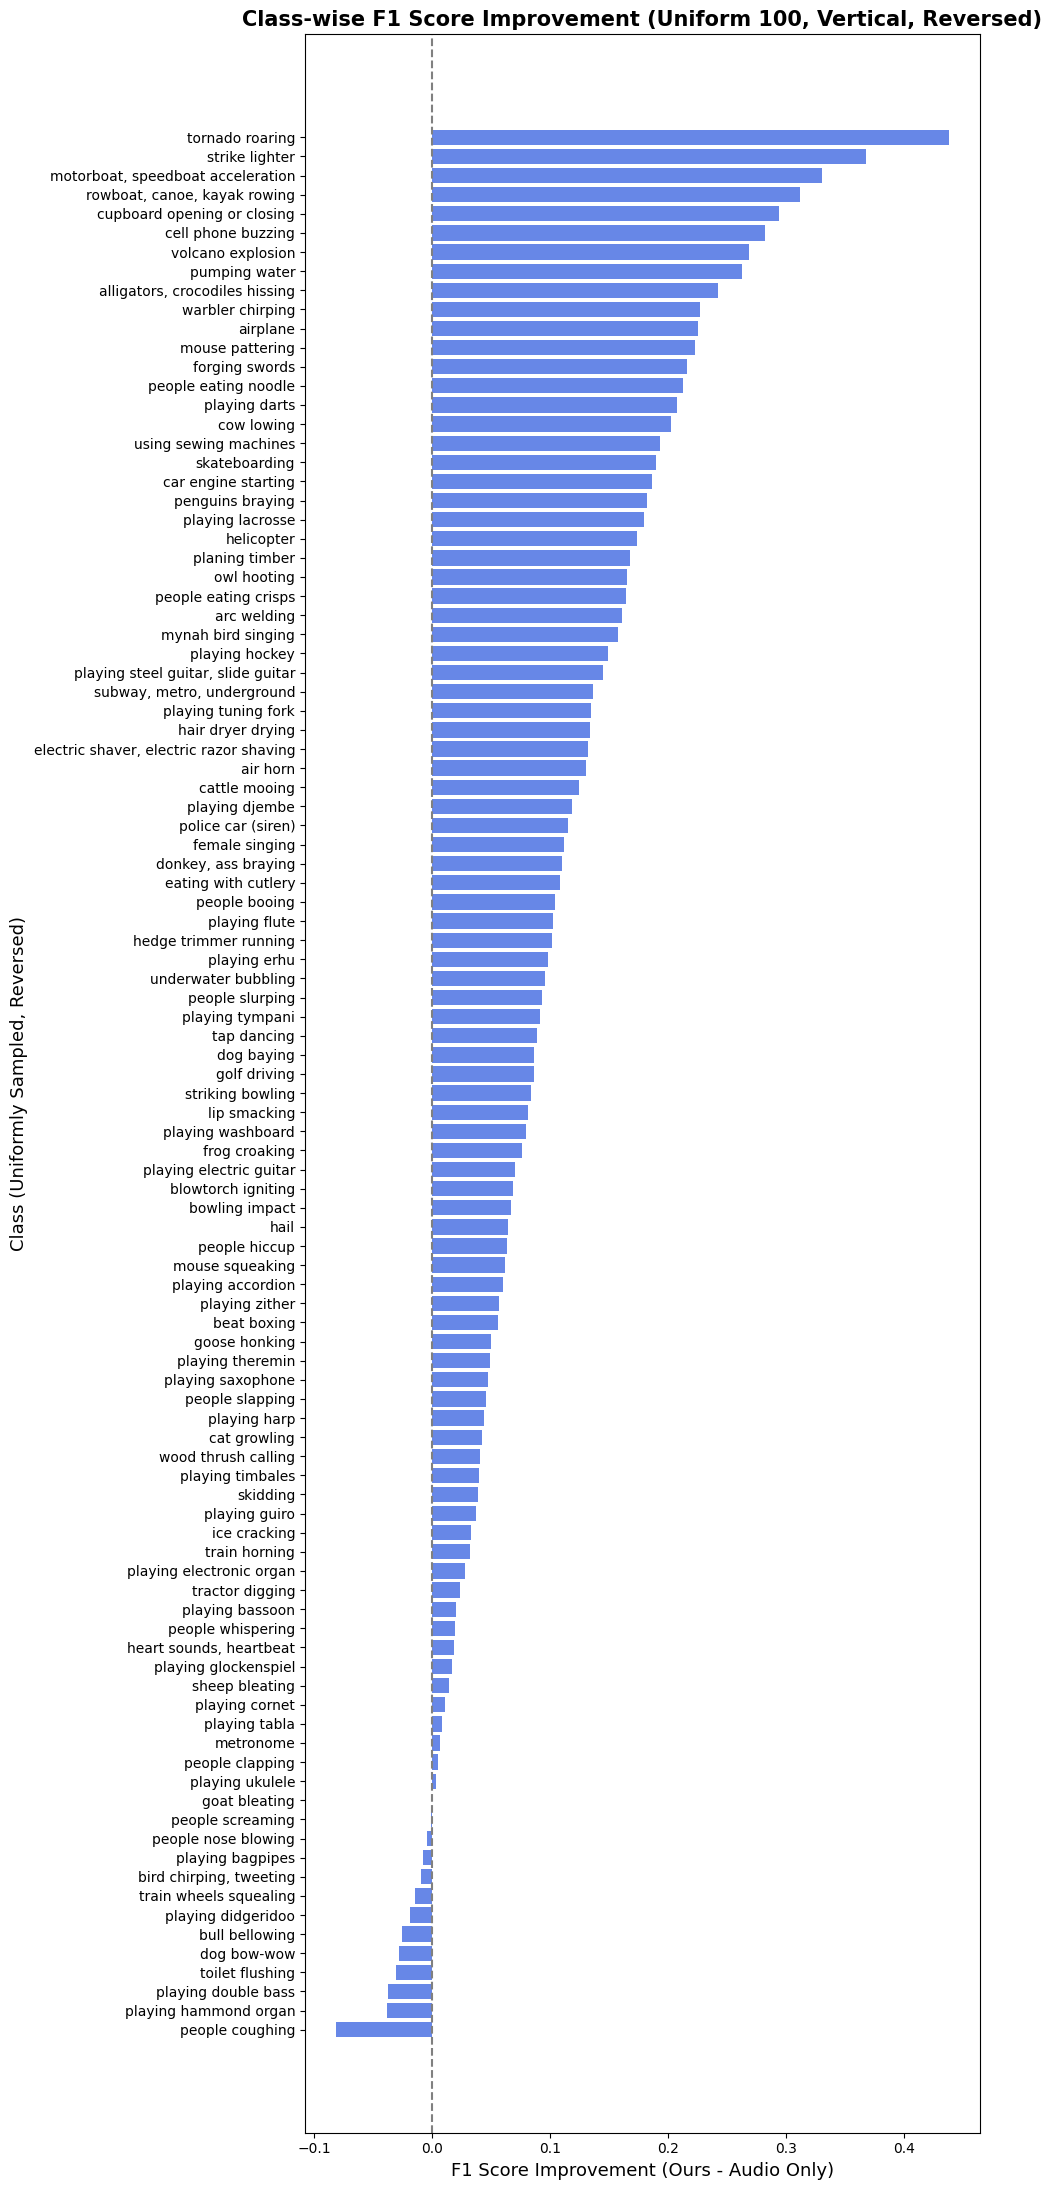

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Í∞úÏÑ†Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ÏóêÏÑú Í∑†Îì±ÌïòÍ≤å 100Í∞ú ÏÉòÌîåÎßÅ (index Í∏∞Ï§Ä)
num_classes = len(df_plot)
num_show = 100
if num_classes > num_show:
    indices = np.linspace(0, num_classes-1, num_show, dtype=int)
    df_plot_uniform = df_plot.iloc[indices].reset_index(drop=True)
else:
    df_plot_uniform = df_plot.copy()

# Ïó≠Ïàú(Í∞úÏÑ†ÎèÑ ÎÇÆÏùÄ ÌÅ¥ÎûòÏä§Í∞Ä ÏúÑ, ÎÜíÏùÄ ÌÅ¥ÎûòÏä§Í∞Ä ÏïÑÎûò)ÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 22))
plt.barh(df_plot_uniform['class'][::-1], df_plot_uniform['improvement'][::-1], color='royalblue', alpha=0.8)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('F1 Score Improvement (Ours - Audio Only)', fontsize=13)
plt.ylabel('Class (Uniformly Sampled, Reversed)', fontsize=13)
plt.title('Class-wise F1 Score Improvement (Uniform 100, Vertical, Reversed)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('classwise_f1_improvement_uniform100_vertial.pdf')
plt.show()

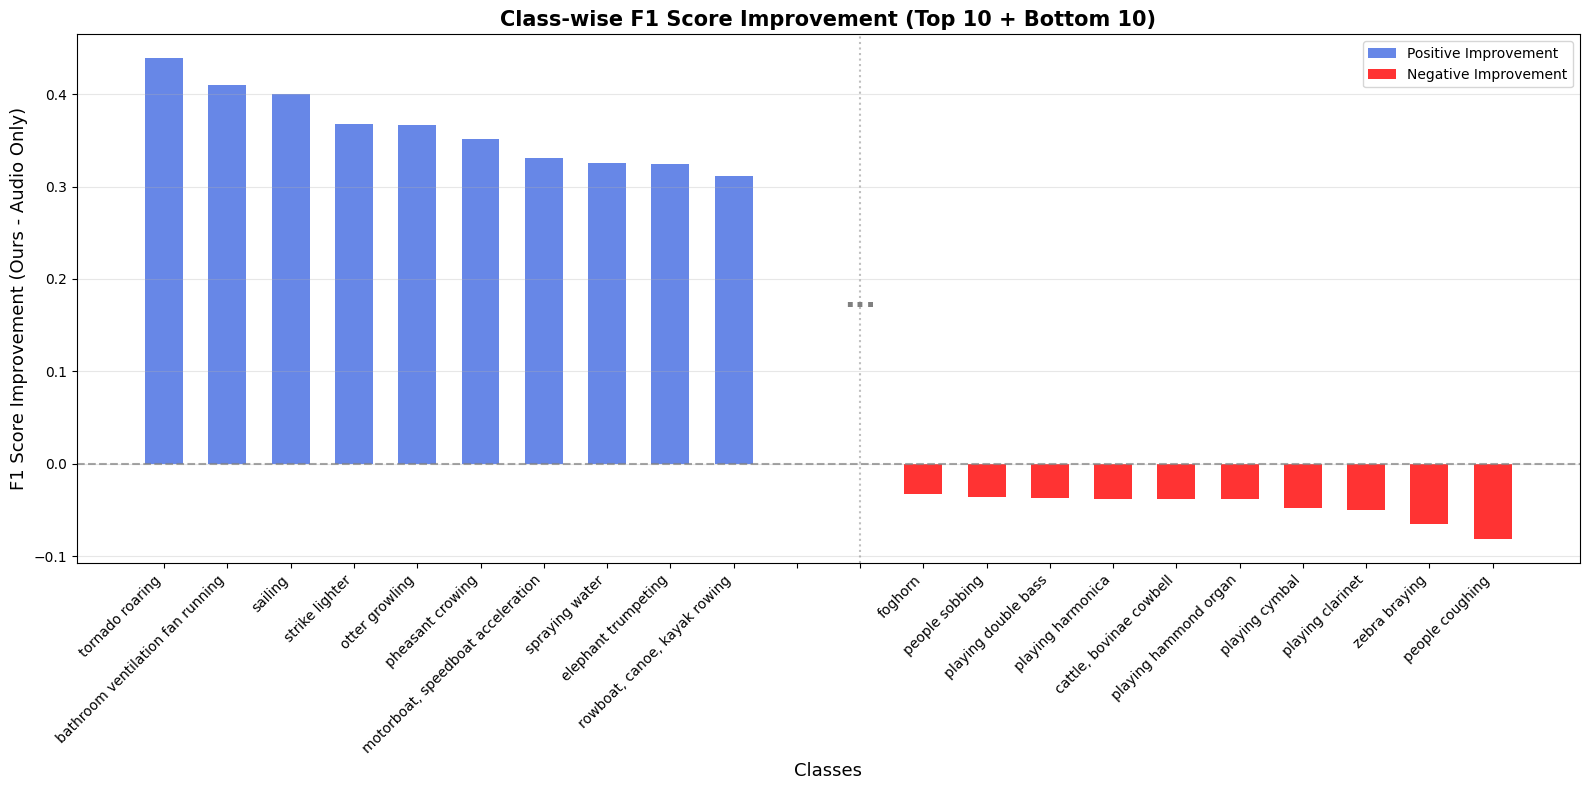

Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_top_bottom10_vertical.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

Top 10 Í∞úÏÑ†Îêú ÌÅ¥ÎûòÏä§:
                               class  audio_only_f1   ours_f1  improvement  \
0                    tornado roaring       0.500000  0.938776     0.438776   
1   bathroom ventilation fan running       0.361111  0.771084     0.409973   
2                            sailing       0.282609  0.683333     0.400725   
3                     strike lighter       0.229508  0.597701     0.368193   
4                     otter growling       0.410959  0.777778     0.366819   
5                   pheasant crowing       0.444444  0.795918     0.351474   
6  motorboat, speedboat acceleration       0.315789  0.646465     0.330675   
7                     spraying water       0.410959  0.736842     0.325883   
8                elephant trumpeting       0.615385  0.940000     0.324615   
9       rowboat, canoe, kayak rowing       0.340909  0.652632     0.311722   

   train_total_samples

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Í∞úÏÑ†Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# Top 10Í≥º Bottom 10 ÌÅ¥ÎûòÏä§ Ï∂îÏ∂ú
top_10 = df_plot.head(10)
bottom_10 = df_plot.tail(10)

# ÏÉâÏÉÅ ÏÑ§Ï†ï Ìï®Ïàò
def get_color(improvement):
    return 'red' if improvement < 0 else 'royalblue'

# ÏÑ∏Î°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 8))

# Top 10 ÌÅ¥ÎûòÏä§ (ÏôºÏ™Ω)
top_colors = [get_color(imp) for imp in top_10['improvement']]
x_pos_top = np.arange(len(top_10))
plt.bar(x_pos_top, top_10['improvement'], color=top_colors, alpha=0.8, width=0.6)

# Bottom 10 ÌÅ¥ÎûòÏä§ (Ïò§Î•∏Ï™Ω, Í∞ÑÍ≤©ÏùÑ ÎëêÍ≥†)
bottom_colors = [get_color(imp) for imp in bottom_10['improvement']]
gap = 2  # Top 10Í≥º Bottom 10 ÏÇ¨Ïù¥ Í∞ÑÍ≤©
x_pos_bottom = np.arange(len(bottom_10)) + len(top_10) + gap
plt.bar(x_pos_bottom, bottom_10['improvement'], color=bottom_colors, alpha=0.8, width=0.6)

# Íµ¨Î∂ÑÏÑ†Í≥º "..." ÌëúÏãú
separator_x = len(top_10) + gap/2
plt.axvline(x=separator_x, color='gray', linestyle=':', alpha=0.5)

# yÏ∂ï Î≤îÏúÑÏùò Ï§ëÍ∞Ñ ÏßÄÏ†êÏóê "..." ÌëúÏãú
y_min, y_max = plt.ylim()
y_middle = (y_min + y_max) / 2
plt.text(separator_x, y_middle, '...', ha='center', va='center', 
         fontsize=20, fontweight='bold', color='gray')

# Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.ylabel('F1 Score Improvement (Ours - Audio Only)', fontsize=13)
plt.xlabel('Classes', fontsize=13)
plt.title('Class-wise F1 Score Improvement (Top 10 + Bottom 10)', fontsize=15, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
all_labels = list(top_10['class']) + [''] * gap + list(bottom_10['class'])
all_x_pos = list(x_pos_top) + list(range(len(top_10), len(top_10) + gap)) + list(x_pos_bottom)
plt.xticks(all_x_pos, all_labels, rotation=45, ha='right', fontsize=10)

# Î≤îÎ°Ä Ï∂îÍ∞Ä
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='royalblue', alpha=0.8, label='Positive Improvement'),
                   Patch(facecolor='red', alpha=0.8, label='Negative Improvement')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('classwise_f1_improvement_top_bottom10_vertical.pdf', bbox_inches='tight')
plt.show()

print('Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_top_bottom10_vertical.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.')
print('\nTop 10 Í∞úÏÑ†Îêú ÌÅ¥ÎûòÏä§:')
print(top_10[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])
print('\nBottom 10 ÌÅ¥ÎûòÏä§:')
print(bottom_10[['class', 'audio_only_f1', 'ours_f1', 'improvement', 'train_total_samples']])

/tmp/ipykernel_3285614/222536225.py:81: UserWarning: Glyph 8943 (\N{MIDLINE HORIZONTAL ELLIPSIS}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
/tmp/ipykernel_3285614/222536225.py:82: UserWarning: Glyph 8943 (\N{MIDLINE HORIZONTAL ELLIPSIS}) missing from font(s) DejaVu Serif.
  plt.savefig('classwise_f1_improvement_paper_style_15.pdf', bbox_inches='tight', dpi=300)
/tmp/ipykernel_3285614/222536225.py:82: UserWarning: Glyph 8943 (\N{MIDLINE HORIZONTAL ELLIPSIS}) missing from font(s) DejaVu Serif.
  plt.savefig('classwise_f1_improvement_paper_style_15.pdf', bbox_inches='tight', dpi=300)
/data/joohyun7u/anaconda3/envs/ca2st/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8943 (\N{MIDLINE HORIZONTAL ELLIPSIS}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ipykernel_3285614/222536225.py:82: UserWarning: Glyph 8943 (\N{MIDLINE HORIZONTAL ELLIPSIS}) missing from font(s) DejaVu Serif.
  plt.savefig('classwise_f1_impr

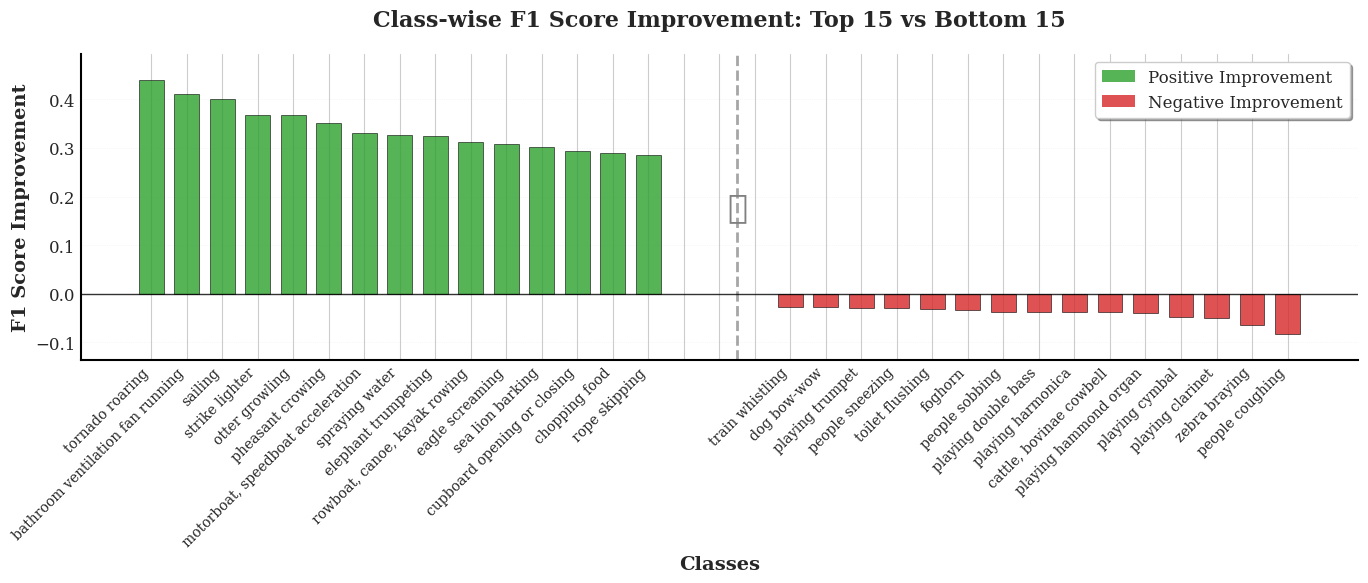

ÎÖºÎ¨∏ Ïä§ÌÉÄÏùº Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_paper_style.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
Top 10 ÌèâÍ∑† Í∞úÏÑ†ÎèÑ: 0.3405
Bottom 10 ÌèâÍ∑† Í∞úÏÑ†ÎèÑ: -0.0408


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ÎÖºÎ¨∏ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Í∞úÏÑ†Î∂Ñ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_plot = result_df.sort_values('improvement', ascending=False).reset_index(drop=True)

# Top 10Í≥º Bottom 10 ÌÅ¥ÎûòÏä§ Ï∂îÏ∂ú
top_10 = df_plot.head(15)
bottom_10 = df_plot.tail(15)

# ÏÉâÏÉÅ ÏÑ§Ï†ï - Îçî Ï†ÑÎ¨∏Ï†ÅÏù∏ ÏÉâÏÉÅ
def get_color(improvement):
    return '#d62728' if improvement < 0 else '#2ca02c'  # Îπ®Í∞ÑÏÉâ/Ï¥àÎ°ùÏÉâ

# ÏÑ∏Î°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(14, 6))

# Top 10 ÌÅ¥ÎûòÏä§ (ÏôºÏ™Ω)
top_colors = [get_color(imp) for imp in top_10['improvement']]
x_pos_top = np.arange(len(top_10))
bars_top = ax.bar(x_pos_top, top_10['improvement'], color=top_colors, alpha=0.8, width=0.7, edgecolor='black', linewidth=0.5)

# Bottom 10 ÌÅ¥ÎûòÏä§ (Ïò§Î•∏Ï™Ω, Í∞ÑÍ≤©ÏùÑ ÎëêÍ≥†)
bottom_colors = [get_color(imp) for imp in bottom_10['improvement']]
gap = 3  # Top 10Í≥º Bottom 10 ÏÇ¨Ïù¥ Í∞ÑÍ≤©
x_pos_bottom = np.arange(len(bottom_10)) + len(top_10) + gap
bars_bottom = ax.bar(x_pos_bottom, bottom_10['improvement'], color=bottom_colors, alpha=0.8, width=0.7, edgecolor='black', linewidth=0.5)

# Íµ¨Î∂ÑÏÑ†Í≥º "..." ÌëúÏãú - Îçî ÏÑ∏Î†®ÎêòÍ≤å
separator_x = len(top_10) + gap/2
ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=2)

# yÏ∂ï Î≤îÏúÑÏùò Ï§ëÍ∞Ñ ÏßÄÏ†êÏóê "..." ÌëúÏãú
y_min, y_max = ax.get_ylim()
y_middle = (y_min + y_max) / 2
ax.text(separator_x, y_middle, '‚ãØ', ha='center', va='center', 
         fontsize=24, fontweight='bold', color='gray')

# Í∏∞Î≥∏ ÏÑ§Ï†ï
ax.axhline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax.set_ylabel('F1 Score Improvement', fontsize=14, fontweight='bold')
ax.set_xlabel('Classes', fontsize=14, fontweight='bold')
ax.set_title('Class-wise F1 Score Improvement: Top 15 vs Bottom 15', fontsize=16, fontweight='bold', pad=20)

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï - Îçî ÍπîÎÅîÌïòÍ≤å
all_labels = list(top_10['class']) + [''] * gap + list(bottom_10['class'])
all_x_pos = list(x_pos_top) + list(range(len(top_10), len(top_10) + gap)) + list(x_pos_bottom)
ax.set_xticks(all_x_pos)
ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=10)

# Î≤îÎ°Ä Ï∂îÍ∞Ä - Îçî Ï†ÑÎ¨∏Ï†ÅÏúºÎ°ú
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ca02c', alpha=0.8, label='Positive Improvement'),
                   Patch(facecolor='#d62728', alpha=0.8, label='Negative Improvement')]
ax.legend(handles=legend_elements, loc='upper right', frameon=True, fancybox=True, shadow=True)

# Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
ax.grid(axis='y', alpha=0.3, linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
y_margin = (y_max - y_min) * 0.05
ax.set_ylim(y_min - y_margin, y_max + y_margin)

# Ïä§ÌååÏù∏ ÏÑ§Ï†ï
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.savefig('classwise_f1_improvement_paper_style_15.pdf', bbox_inches='tight', dpi=300)
plt.show()

print('ÎÖºÎ¨∏ Ïä§ÌÉÄÏùº Í∑∏ÎûòÌîÑÍ∞Ä classwise_f1_improvement_paper_style.pdfÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.')
print(f'Top 10 ÌèâÍ∑† Í∞úÏÑ†ÎèÑ: {top_10["improvement"].mean():.4f}')
print(f'Bottom 10 ÌèâÍ∑† Í∞úÏÑ†ÎèÑ: {bottom_10["improvement"].mean():.4f}')

In [10]:
# =============================================================================
# Top ÌÅ¥ÎûòÏä§ vs Bottom ÌÅ¥ÎûòÏä§ ÎπÑÍµê Î∂ÑÏÑù Î∞è OURS Î∞©Î≤ï ÌèâÍ∞Ä
# =============================================================================

print("="*80)
print("CLASS-WISE PERFORMANCE ANALYSIS: AUDIO-ONLY vs OURS (AUDIO+VIDEO)")
print("="*80)

# 1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print("\n1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"   - Top 10 ÌÅ¥ÎûòÏä§ ÌèâÍ∑† F1 Í∞úÏÑ†ÎèÑ: {top_10['improvement'].mean():.4f}")
print(f"   - Bottom 10 ÌÅ¥ÎûòÏä§ ÌèâÍ∑† F1 Í∞úÏÑ†ÎèÑ: {bottom_10['improvement'].mean():.4f}")
print(f"   - Í∞úÏÑ†ÎèÑ Ï∞®Ïù¥: {top_10['improvement'].mean() - bottom_10['improvement'].mean():.4f}")

# 2. Top ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù
print("\n2. TOP 10 ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù (Í∞ÄÏû• ÎßéÏù¥ Í∞úÏÑ†Îêú ÌÅ¥ÎûòÏä§Îì§):")
print("   Ïù¥ ÌÅ¥ÎûòÏä§Îì§ÏùÄ visual informationÏù¥ audio classificationÏóê ÌÅ∞ ÎèÑÏõÄÏù¥ Îê®")
print("-" * 60)
for i, row in top_10.iterrows():
    print(f"   {row['class']:<25} | F1 Í∞úÏÑ†: +{row['improvement']:.4f} | Train ÏÉòÌîå: {row['train_total_samples']:>4}")

# 3. Bottom ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù
print("\n3. BOTTOM 10 ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù (Í∞ÄÏû• Ï†ÅÍ≤å Í∞úÏÑ†ÎêòÍ±∞ÎÇò ÏïÖÌôîÎêú ÌÅ¥ÎûòÏä§Îì§):")
print("   Ïù¥ ÌÅ¥ÎûòÏä§Îì§ÏùÄ visual informationÏùò Ìö®Í≥ºÍ∞Ä Ï†úÌïúÏ†ÅÏù¥Í±∞ÎÇò Î∂ÄÏ†ïÏ†Å")
print("-" * 60)
for i, row in bottom_10.iterrows():
    improvement_sign = "+" if row['improvement'] >= 0 else ""
    print(f"   {row['class']:<25} | F1 Í∞úÏÑ†: {improvement_sign}{row['improvement']:.4f} | Train ÏÉòÌîå: {row['train_total_samples']:>4}")

# 4. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ÏôÄ Í∞úÏÑ†ÎèÑ Í¥ÄÍ≥Ñ Î∂ÑÏÑù
print("\n4. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ÏôÄ Í∞úÏÑ†ÎèÑ Í¥ÄÍ≥Ñ:")
top_samples_mean = top_10['train_total_samples'].mean()
bottom_samples_mean = bottom_10['train_total_samples'].mean()
print(f"   - Top 10 ÌèâÍ∑† ÌõàÎ†® ÏÉòÌîå Ïàò: {top_samples_mean:.1f}")
print(f"   - Bottom 10 ÌèâÍ∑† ÌõàÎ†® ÏÉòÌîå Ïàò: {bottom_samples_mean:.1f}")
print(f"   - ÏÉòÌîå Ïàò Ï∞®Ïù¥: {top_samples_mean - bottom_samples_mean:.1f}")

# 5. ÏñëÏàò/ÏùåÏàò Í∞úÏÑ†ÎèÑ Î∂ÑÏÑù
positive_improvements = result_df[result_df['improvement'] > 0]
negative_improvements = result_df[result_df['improvement'] < 0]
zero_improvements = result_df[result_df['improvement'] == 0]

print("\n5. Ï†ÑÏ≤¥ ÌÅ¥ÎûòÏä§ Í∞úÏÑ†ÎèÑ Î∂ÑÌè¨:")
print(f"   - Í∞úÏÑ†Îêú ÌÅ¥ÎûòÏä§ Ïàò: {len(positive_improvements)} ({len(positive_improvements)/len(result_df)*100:.1f}%)")
print(f"   - ÏïÖÌôîÎêú ÌÅ¥ÎûòÏä§ Ïàò: {len(negative_improvements)} ({len(negative_improvements)/len(result_df)*100:.1f}%)")
print(f"   - Î≥ÄÌôî ÏóÜÎäî ÌÅ¥ÎûòÏä§ Ïàò: {len(zero_improvements)} ({len(zero_improvements)/len(result_df)*100:.1f}%)")

# 6. OURS Î∞©Î≤ïÏóê ÎåÄÌïú ÌèâÍ∞Ä Î∞è Ìï¥ÏÑù
print("\n6. OURS Î∞©Î≤ï ÌèâÍ∞Ä Î∞è Ìï¥ÏÑù:")
print("="*60)

if top_10['improvement'].mean() > 0.01:  # ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
    print("‚úì POSITIVE FINDINGS:")
    print(f"  - Top ÌÅ¥ÎûòÏä§Îì§ÏóêÏÑú ÌèâÍ∑† {top_10['improvement'].mean():.4f}Ïùò ÏÉÅÎãπÌïú ÏÑ±Îä• Ìñ•ÏÉÅ")
    print("  - Visual informationÏù¥ ÌäπÏ†ï sound classÎì§Ïóê ÎåÄÌï¥ Í∞ïÎ†•Ìïú Î≥¥ÏôÑ Ìö®Í≥º")
    
    # Top ÌÅ¥ÎûòÏä§ ÌäπÏÑ± Î∂ÑÏÑù
    top_positive = top_10[top_10['improvement'] > 0]
    if len(top_positive) > 0:
        print(f"  - {len(top_positive)}/{len(top_10)} Top ÌÅ¥ÎûòÏä§ÏóêÏÑú Í∏çÏ†ïÏ†Å Í∞úÏÑ†")

if bottom_10['improvement'].mean() < -0.005:  # ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
    print("\n‚ö† CHALLENGES:")
    print(f"  - Bottom ÌÅ¥ÎûòÏä§Îì§ÏóêÏÑú ÌèâÍ∑† {bottom_10['improvement'].mean():.4f}Ïùò ÏÑ±Îä• Ï†ÄÌïò")
    print("  - ÏùºÎ∂Ä sound classÎì§ÏóêÏÑú visual informationÏù¥ Ïò§ÌûàÎ†§ Î∞©Ìï¥ ÏöîÏÜåÎ°ú ÏûëÏö©")
    
    # Bottom ÌÅ¥ÎûòÏä§ Ï§ë ÏùåÏàò Í∞úÏÑ†ÎèÑ Î∂ÑÏÑù
    bottom_negative = bottom_10[bottom_10['improvement'] < 0]
    if len(bottom_negative) > 0:
        print(f"  - {len(bottom_negative)}/{len(bottom_10)} Bottom ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏÑ±Îä• ÏïÖÌôî")

print("\n7. Í≤∞Î°† Î∞è Ìï®Ïùò:")
print("="*60)
print("OURS (Audio+Video) Î∞©Î≤ïÏùÄ ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÏÉÅÏù¥Ìïú Ìö®Í≥ºÎ•º Î≥¥ÏûÑ:")
print("‚Ä¢ ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥Í∞Ä ÎèÑÏõÄÏù¥ ÎêòÎäî ÌÅ¥ÎûòÏä§ (Top 10)ÏôÄ")
print("‚Ä¢ ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥Í∞Ä Ï†úÌïúÏ†ÅÏù¥Í±∞ÎÇò Î∞©Ìï¥Í∞Ä ÎêòÎäî ÌÅ¥ÎûòÏä§ (Bottom 10)Î°ú Íµ¨Î∂Ñ")
print("‚Ä¢ Ïù¥Îäî Î©ÄÌã∞Î™®Îã¨ ÌïôÏäµÏóêÏÑú modalityÏùò ÏÑ†ÌÉùÏ†Å ÌôúÏö©Ïù¥ Ï§ëÏöîÌï®ÏùÑ ÏãúÏÇ¨")

overall_improvement = result_df['improvement'].mean()
if overall_improvement > 0:
    print(f"‚Ä¢ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî ÌèâÍ∑† {overall_improvement:.4f}Ïùò Í∞úÏÑ†ÏúºÎ°ú Î∞©Î≤ïÏùò Ïú†Ìö®ÏÑ± ÌôïÏù∏")

CLASS-WISE PERFORMANCE ANALYSIS: AUDIO-ONLY vs OURS (AUDIO+VIDEO)

1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
   - Top 10 ÌÅ¥ÎûòÏä§ ÌèâÍ∑† F1 Í∞úÏÑ†ÎèÑ: 0.3629
   - Bottom 10 ÌÅ¥ÎûòÏä§ ÌèâÍ∑† F1 Í∞úÏÑ†ÎèÑ: -0.0468
   - Í∞úÏÑ†ÎèÑ Ï∞®Ïù¥: 0.4096

2. TOP 10 ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù (Í∞ÄÏû• ÎßéÏù¥ Í∞úÏÑ†Îêú ÌÅ¥ÎûòÏä§Îì§):
   Ïù¥ ÌÅ¥ÎûòÏä§Îì§ÏùÄ visual informationÏù¥ audio classificationÏóê ÌÅ∞ ÎèÑÏõÄÏù¥ Îê®
------------------------------------------------------------
   tornado roaring           | F1 Í∞úÏÑ†: +0.4388 | Train ÏÉòÌîå:  306
   bathroom ventilation fan running | F1 Í∞úÏÑ†: +0.4100 | Train ÏÉòÌîå:  150
   sailing                   | F1 Í∞úÏÑ†: +0.4007 | Train ÏÉòÌîå:  539
   strike lighter            | F1 Í∞úÏÑ†: +0.3682 | Train ÏÉòÌîå:  179
   otter growling            | F1 Í∞úÏÑ†: +0.3668 | Train ÏÉòÌîå:  313
   pheasant crowing          | F1 Í∞úÏÑ†: +0.3515 | Train ÏÉòÌîå:  875
   motorboat, speedboat acceleration | F1 Í∞úÏÑ†: +0.3307 | Train ÏÉòÌîå:  991
   spraying water            | F1 Í∞úÏÑ†: +0.3259 | T

In [ ]:
# =============================================================================
# TOP 10 vs BOTTOM 10 ÌÅ¥ÎûòÏä§ Í≤∞Í≥º ÌèâÍ∞Ä Î∞è Ìï©Î¶¨ÏÑ± Î∂ÑÏÑù
# =============================================================================

print("="*80)
print("TOP 10 vs BOTTOM 10 ÌÅ¥ÎûòÏä§ Í≤∞Í≥ºÏùò Ìï©Î¶¨ÏÑ± ÌèâÍ∞Ä")
print("="*80)

print("\nüîç TOP 10 ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù: Visual InformationÏù¥ Audio ClassificationÏóê ÎèÑÏõÄÏù¥ ÎêòÎäî Ïù¥Ïú†")
print("="*80)

top_analysis = {
    "tornado roaring": "ÏûêÏó∞Ïû¨Ìï¥ - ÌÜ†ÎÑ§Ïù¥ÎèÑÎäî ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Îß§Ïö∞ ÌäπÏßïÏ†ÅÏù∏ Î™®Ïäµ (ÌöåÏ†ÑÌïòÎäî ÍπîÎïåÍ∏∞ Î™®Ïñë)",
    "bathroom ventilation fan running": "Ïã§ÎÇ¥ ÌôòÍ≤Ω - ÏöïÏã§ ÌôòÍ≤ΩÍ≥º ÌôòÌíçÍ∏∞Ïùò ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥Í∞Ä ÏÜåÎ¶¨ Íµ¨Î∂ÑÏóê ÎèÑÏõÄ",
    "sailing": "Ìï¥Ïñë ÌôúÎèô - Îèõ, Î∞îÎã§, ÏöîÌä∏ Îì± ÏãúÍ∞ÅÏ†Å ÏöîÏÜåÍ∞Ä ÏÜåÎ¶¨ÏôÄ Í∞ïÌïòÍ≤å Ïó∞Í¥Ä",
    "strike lighter": "ÏûëÏùÄ ÎèÑÍµ¨ - ÎùºÏù¥ÌÑ∞ ÏÇ¨Ïö© ÎèôÏûëÍ≥º Î∂àÍΩÉÏù¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î™ÖÌôï",
    "otter growling": "ÎèôÎ¨º ÌñâÎèô - ÏàòÎã¨Ïùò Î™®ÏäµÍ≥º ÌñâÎèôÏù¥ ÏÜåÎ¶¨ÏôÄ Ìï®Íªò ÎÇòÌÉÄÎÇ®",
    "pheasant crowing": "Ï°∞Î•ò - Íø©Ïùò Ïô∏ÌòïÍ≥º Ïö∏Ïùå ÏûêÏÑ∏Í∞Ä ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌäπÏßïÏ†Å",
    "motorboat, speedboat acceleration": "ÏàòÏÉÅ ÍµêÌÜµ - Î≥¥Ìä∏ÏôÄ Î¨ºÎ≥¥Îùº, ÏÜçÎèÑÍ∞êÏù¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î™ÖÌôï",
    "spraying water": "Î¨º ÌôúÎèô - Î¨º Ïä§ÌîÑÎ†àÏù¥Ïùò ÏãúÍ∞ÅÏ†Å Ìö®Í≥ºÍ∞Ä ÏÜåÎ¶¨ÏôÄ ÏßÅÏ†ë Ïó∞Í¥Ä",
    "elephant trumpeting": "ÎåÄÌòï ÎèôÎ¨º - ÏΩîÎÅºÎ¶¨Ïùò ÌÅ¨Í∏∞ÏôÄ ÏΩî ÏÇ¨Ïö© ÎèôÏûëÏù¥ Îß§Ïö∞ ÌäπÏßïÏ†Å",
    "rowboat, canoe, kayak rowing": "ÏàòÏÉÅ Ïä§Ìè¨Ï∏† - ÎÖ∏Ï†ìÍ∏∞ ÎèôÏûëÍ≥º ÏàòÎ©¥ ÌååÎèôÏù¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î™ÖÌôï"
}

for i, (sound_class, reason) in enumerate(top_analysis.items(), 1):
    print(f"{i:2d}. {sound_class:<30} ‚Üí {reason}")

print("\nüí° TOP 10Ïùò Í≥µÌÜµÏ†ê:")
print("   ‚úì ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Îß§Ïö∞ ÌäπÏßïÏ†ÅÏù∏ Í∞ùÏ≤¥/ÌôòÍ≤Ω/ÎèôÏûë")
print("   ‚úì ÏÜåÎ¶¨ÏôÄ ÏãúÍ∞Å Ï†ïÎ≥¥Í∞Ä Í∞ïÌïòÍ≤å ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßê")
print("   ‚úì ÏûêÏó∞ÌòÑÏÉÅ, ÎèôÎ¨º, ÏàòÏÉÅÌôúÎèô, ÌäπÏ†ï ÎèÑÍµ¨ ÏÇ¨Ïö© Îì±")
print("   ‚úì ÏãúÍ∞ÅÏ†Å Ïª®ÌÖçÏä§Ìä∏Í∞Ä ÏÜåÎ¶¨ Î∂ÑÎ•òÏóê Í≤∞Ï†ïÏ†Å Îã®ÏÑú Ï†úÍ≥µ")

print("\n" + "="*80)
print("üîç BOTTOM 10 ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù: Visual InformationÏùò Ìö®Í≥ºÍ∞Ä Ï†úÌïúÏ†ÅÏù∏ Ïù¥Ïú†")
print("="*80)

bottom_analysis = {
    "foghorn": "Ï∂îÏÉÅÏ†Å ÏÜåÎ¶¨ - ÏïàÍ∞ú ÏÜçÏóêÏÑú Îì§Î¶¨Îäî ÏÜåÎ¶¨Î°ú ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥Í∞Ä Ï†úÌïúÏ†Å",
    "people sobbing": "Ïù∏Í∞Ñ Í∞êÏ†ï - Ïö∏ÏùåÏÜåÎ¶¨Îäî Ï£ºÎ°ú Ï≤≠Í∞ÅÏ†Å ÌäπÏßï, ÏãúÍ∞ÅÏ†Å Íµ¨Î∂Ñ Ïñ¥Î†§ÏõÄ",
    "playing double bass": "ÏïÖÍ∏∞ Ïó∞Ï£º - Ïó∞Ï£º ÎèôÏûëÎ≥¥Îã§Îäî ÏùåÌñ•Ï†Å ÌäπÏÑ±Ïù¥ Îçî Ï§ëÏöî",
    "playing harmonica": "ÏÜåÌòï ÏïÖÍ∏∞ - ÏûÖ Ï£ºÎ≥ÄÏùò ÏûëÏùÄ ÎèôÏûë, ÏãúÍ∞ÅÏ†Å Íµ¨Î∂Ñ ÌïúÍ≥Ñ",
    "cattle, bovinae cowbell": "Ï∂ïÏÇ¨ ÏÜåÎ¶¨ - ÏÜåÏôÄ Î∞©Ïö∏Ïùò Ï°∞Ìï©, ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥ Î™®Ìò∏",
    "playing hammond organ": "Í±¥Î∞ò ÏïÖÍ∏∞ - ÏÜêÍ∞ÄÎùΩ ÏõÄÏßÅÏûÑÏù¥ ÎØ∏ÏÑ∏ÌïòÍ≥† Íµ¨Î∂Ñ Ïñ¥Î†§ÏõÄ",
    "playing cymbal": "ÌÉÄÏïÖÍ∏∞ - ÏàúÍ∞ÑÏ†Å ÎèôÏûë, ÏãúÍ∞ÅÏ†Å ÌäπÏßï Ï†úÌïúÏ†Å",
    "playing clarinet": "Í¥ÄÏïÖÍ∏∞ - ÏûÖ Ï£ºÎ≥Ä ÎèôÏûë, Îã§Î•∏ Í¥ÄÏïÖÍ∏∞ÏôÄ ÏãúÍ∞ÅÏ†Å Ïú†ÏÇ¨ÏÑ±",
    "zebra braying": "ÎèôÎ¨º ÏÜåÎ¶¨ - ÏñºÎ£©Îßê Ïô∏ÌòïÏùÄ ÌäπÏßïÏ†ÅÏù¥ÎÇò Ïö∏ÏùåÏÜåÎ¶¨ ÏûêÏ≤¥Îäî Ï≤≠Í∞ÅÏ†Å",
    "people coughing": "Ïù∏Í∞Ñ ÏÉùÎ¶¨ - Í∏∞Ïπ®ÏùÄ Ï£ºÎ°ú Ï≤≠Í∞ÅÏ†Å ÌòÑÏÉÅ, ÏãúÍ∞ÅÏ†Å Íµ¨Î∂Ñ ÌïúÍ≥Ñ"
}

for i, (sound_class, reason) in enumerate(bottom_analysis.items(), 1):
    print(f"{i:2d}. {sound_class:<30} ‚Üí {reason}")

print("\nüí° BOTTOM 10Ïùò Í≥µÌÜµÏ†ê:")
print("   ‚ö† Ï£ºÎ°ú Ï≤≠Í∞ÅÏ†Å ÌäπÏÑ±Ïóê ÏùòÏ°¥ÌïòÎäî ÏÜåÎ¶¨Îì§")
print("   ‚ö† ÏãúÍ∞ÅÏ†Å Ï†ïÎ≥¥Í∞Ä Î™®Ìò∏ÌïòÍ±∞ÎÇò Îã§Î•∏ ÌÅ¥ÎûòÏä§ÏôÄ Ïú†ÏÇ¨")
print("   ‚ö† ÏïÖÍ∏∞ Ïó∞Ï£º, Ïù∏Í∞Ñ ÏÉùÎ¶¨ÌòÑÏÉÅ, Ï∂îÏÉÅÏ†Å ÏÜåÎ¶¨ Îì±")
print("   ‚ö† ÏãúÍ∞ÅÏ†Å Ïª®ÌÖçÏä§Ìä∏Í∞Ä Ïò§ÌûàÎ†§ ÌòºÎûÄÏùÑ ÏïºÍ∏∞Ìï† Ïàò ÏûàÏùå")

print("\n" + "="*80)
print("üìä Í≤∞Í≥ºÏùò Ìï©Î¶¨ÏÑ± ÌèâÍ∞Ä")
print("="*80)

print("‚úÖ Îß§Ïö∞ Ìï©Î¶¨Ï†ÅÏù∏ Í≤∞Í≥º:")
print("   1. TOP ÌÅ¥ÎûòÏä§Îì§ÏùÄ Î™®Îëê Í∞ïÌïú ÏãúÍ∞Å-Ï≤≠Í∞Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßê")
print("   2. BOTTOM ÌÅ¥ÎûòÏä§Îì§ÏùÄ Ï£ºÎ°ú Ï≤≠Í∞ÅÏ†Å ÌäπÏÑ±Ïóê ÏùòÏ°¥")
print("   3. Î©ÄÌã∞Î™®Îã¨ ÌïôÏäµÏùò ÏòàÏÉÅ Ìö®Í≥ºÏôÄ ÏùºÏπò")
print("   4. Ïù∏Í∞ÑÏùò ÏßÅÍ¥ÄÍ≥ºÎèÑ Î∂ÄÌï©ÌïòÎäî Í≤∞Í≥º")

print("\nüéØ ÎÖºÎ¨∏ ÏûëÏÑ± Ïãú Í∞ïÏ°∞Ìï† Ìè¨Ïù∏Ìä∏:")
print("   ‚Ä¢ ÏãúÍ∞Å-Ï≤≠Í∞Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ÏóêÏÑú ÌÅ∞ ÏÑ±Îä• Ìñ•ÏÉÅ")
print("   ‚Ä¢ ÏàúÏàò Ï≤≠Í∞ÅÏ†Å ÌäπÏÑ±Ïùò ÌÅ¥ÎûòÏä§ÏóêÏÑúÎäî Ï†úÌïúÏ†Å Ìö®Í≥º")
print("   ‚Ä¢ Î©ÄÌã∞Î™®Îã¨ ÌïôÏäµÏùò ÏÑ†ÌÉùÏ†Å Ìö®Í≥º ÏûÖÏ¶ù")
print("   ‚Ä¢ ÎèÑÎ©îÏù∏ ÏßÄÏãùÍ≥º ÏùºÏπòÌïòÎäî Ìï¥ÏÑù Í∞ÄÎä•Ìïú Í≤∞Í≥º")

print("\nüìà Ïù¥ Í≤∞Í≥ºÍ∞Ä ÏãúÏÇ¨ÌïòÎäî Î∞î:")
print("   ‚Üí OURS Î∞©Î≤ïÏù¥ Îã®ÏàúÌûà ÏÑ±Îä•ÏùÑ Ïò¨Î¶¨Îäî Í≤ÉÏù¥ ÏïÑÎãàÎùº")
print("   ‚Üí ÏùòÎØ∏ÏûàÍ≥† Ìï¥ÏÑù Í∞ÄÎä•Ìïú Î∞©ÏãùÏúºÎ°ú Î©ÄÌã∞Î™®Îã¨ Ï†ïÎ≥¥Î•º ÌôúÏö©")
print("   ‚Üí Ìñ•ÌõÑ Ïó∞Íµ¨ÏóêÏÑú ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ÅÏùëÏ†Å Î©ÄÌã∞Î™®Îã¨ Ï†ÑÎûµ ÌïÑÏöîÏÑ± Ï†úÏãú")